# Example - Movie Runtimes


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

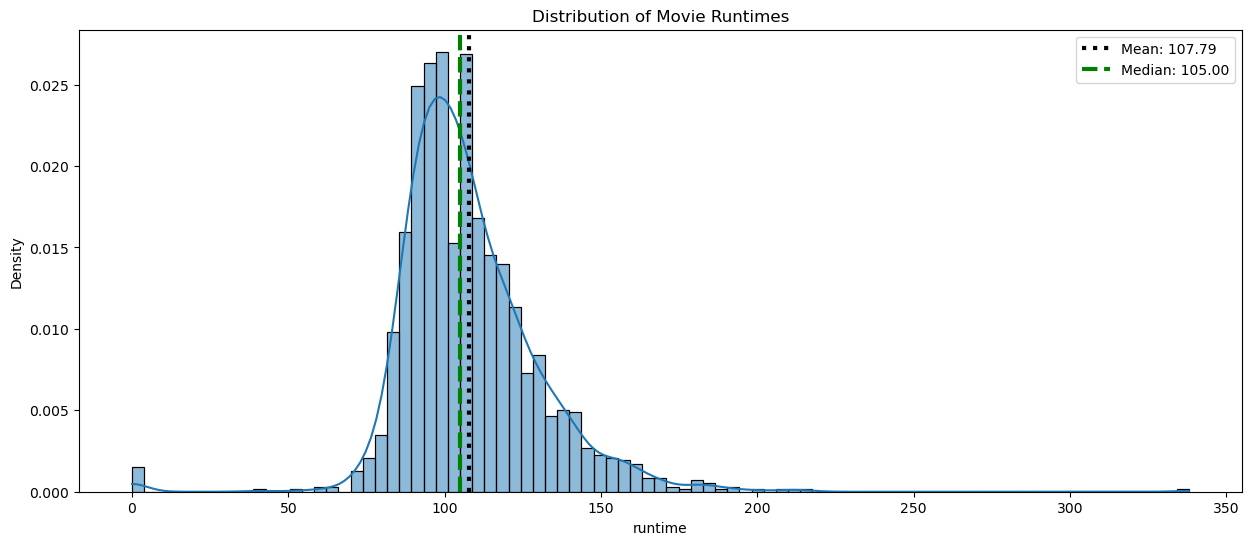

In [3]:
## Load the data
movie_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRzwOVZswzLMacwVwQJLB4WnDZIy46gxMxZzGtJs0FKCLhwXDb8kUI1wmo9-Nll0oo1EpgjFbBoUEV/pub?output=csv"
df = pd.read_csv(movie_url,index_col=0,parse_dates=['release_date'])
## Filter out movie population of interest and remove nulls
## keeping only movies released after 2000 and before 2020
df = df[(df['release_date'] > "2000") & (df['release_date'] <"2020")]
df = df.dropna(subset=['runtime'])

## Slice out data and calc stats
data = df['runtime'].copy()
mean = np.mean(data)
med = np.median(data)
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=data,kde=True,ax=ax,stat='density')
ax.set_title('Distribution of Movie Runtimes')
## Annotate mean and median
ax.axvline(mean,ls=':', color='black', lw=3, label =f"Mean: {mean:.2f}")
ax.axvline(med,ls='--', color='green', lw=3, label =f"Median: {med:.2f}")
ax.legend()

## Comparing Samples to the "Population"
For this demonstration, we will take 2 samples of our population. Each sample will consist of 20 randomly selected values.  For reproducibility, we will set the seed for each sample.  For sample A, we will set the seed to 42.  For sample B, we will set the seed to 32. 
For each sample, we will:

- calculate descriptive statistics
- create a visual of the distribution
- perform the normality test.

## Sample A

In [4]:
np.random.seed(42)
n = 20
## sampling 20 values from data without replacement
sampleA = np.random.choice(data, size=n, replace=False)
sampleA
#The output above just shows which values were randomly included in sample A.

array([164.,  98., 113., 186.,  84., 114., 106.,  91., 125., 117.,  94.,
        90., 152.,  92.,  93.,  85., 116.,  87.,  87., 117.])

### Descriptive Statistics

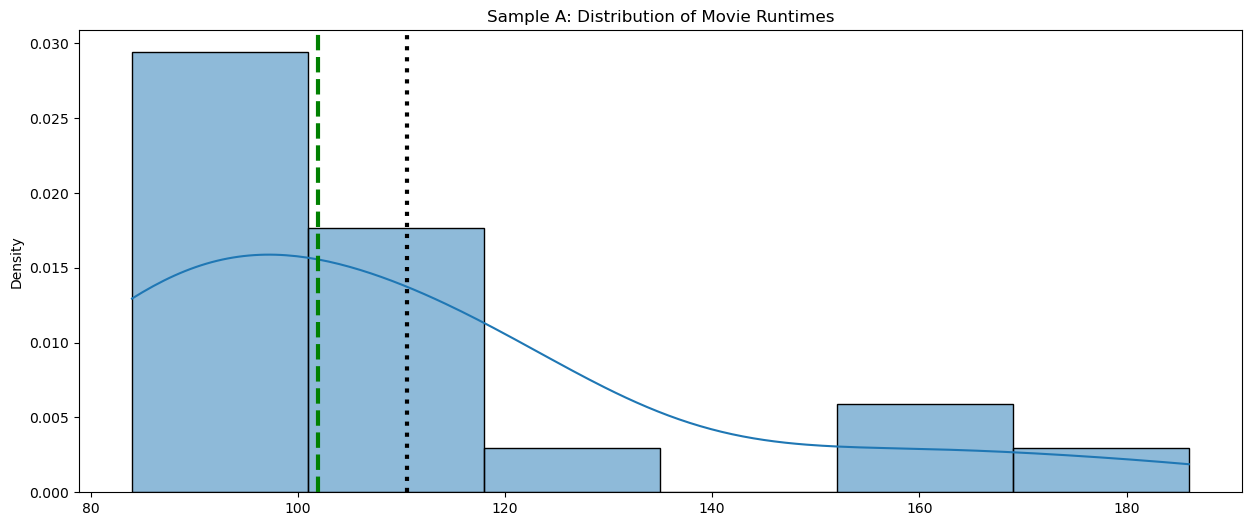

In [5]:
# calculate descriptive stats
sampleA_mean = np.mean(sampleA)
sampleA_med = np.median(sampleA)
sampleA_std = np.std(sampleA)

#Visualization
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=sampleA,kde=True,ax=ax,stat='density')
ax.set_title('Sample A: Distribution of Movie Runtimes')
## Annotate mean and median
ax.axvline(sampleA_mean, ls=':', color='black', lw=3, label =f"Mean: {sampleA_mean:.2f}")
ax.axvline(sampleA_med,ls='--', color='green', lw=3, label =f"Median: {sampleA_med:.2f}")

### Test for normality

In [6]:
result = stats.normaltest(sampleA)
print(result)
result.pvalue < .05
#not normal distributed

NormaltestResult(statistic=9.734874928264695, pvalue=0.00769305377712739)


True

## Sample B

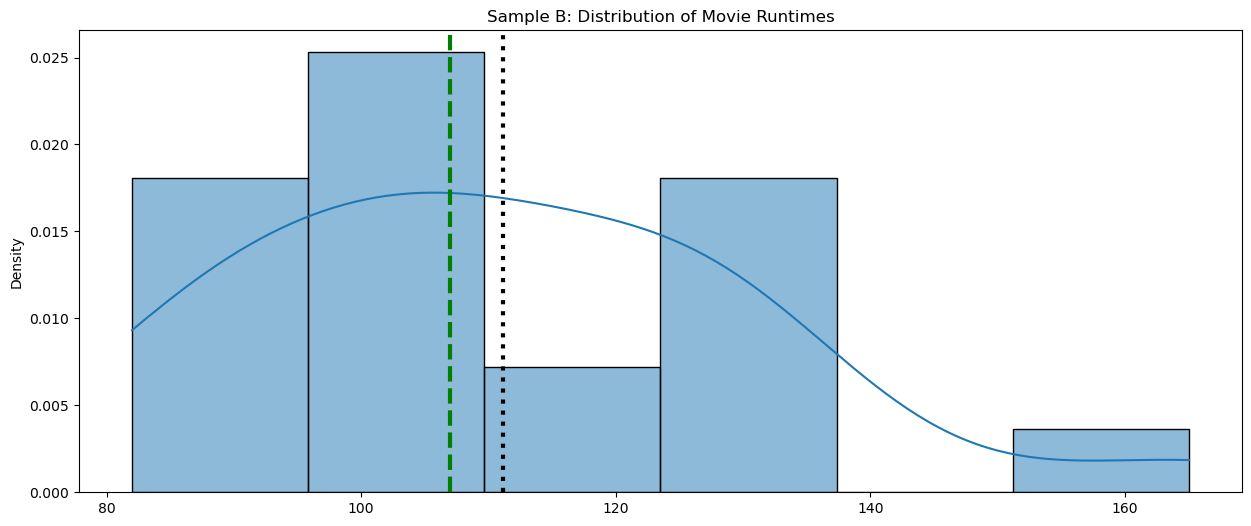

In [7]:
np.random.seed(32)
n = 20
## sampling 20 values from data without replacement
sampleB = np.random.choice(data, size=n, replace=False)
sampleB

# calculate stats
sampleB_mean = np.mean(sampleB)
sampleB_med = np.median(sampleB)
sampleB_std = np.std(sampleB)

## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=sampleB,kde=True,ax=ax,stat='density')
ax.set_title('Sample B: Distribution of Movie Runtimes')
## Annotate mean and median
ax.axvline(sampleB_mean, ls=':', color='black', lw=3, label =f"Mean: {sampleB_mean:.2f}")
ax.axvline(sampleB_med,ls='--', color='green', lw=3, label =f"Median: {sampleB_med:.2f}")

In [8]:
result = stats.normaltest(sampleB)
print(result)
result.pvalue < .05
#In the case of sample B, we can see that our sample IS normally distributed 
#even though the population is NOT.

NormaltestResult(statistic=3.879444116188468, pvalue=0.14374389667857196)


False

# Be aware of Sampling
As we can see in our demonstration, the two samples we chose provided quite different representations of our population. In fact, sample B was so different that it actually passed the normality test!  We must always be careful of making assumptions about an entire population when we only have a sample of the data. 

Yet, sampling is still an essential part of statistics because it is usually not possible to truly have every piece of data for the entire population. There are ways to improve our sampling so that we are better representing the population.

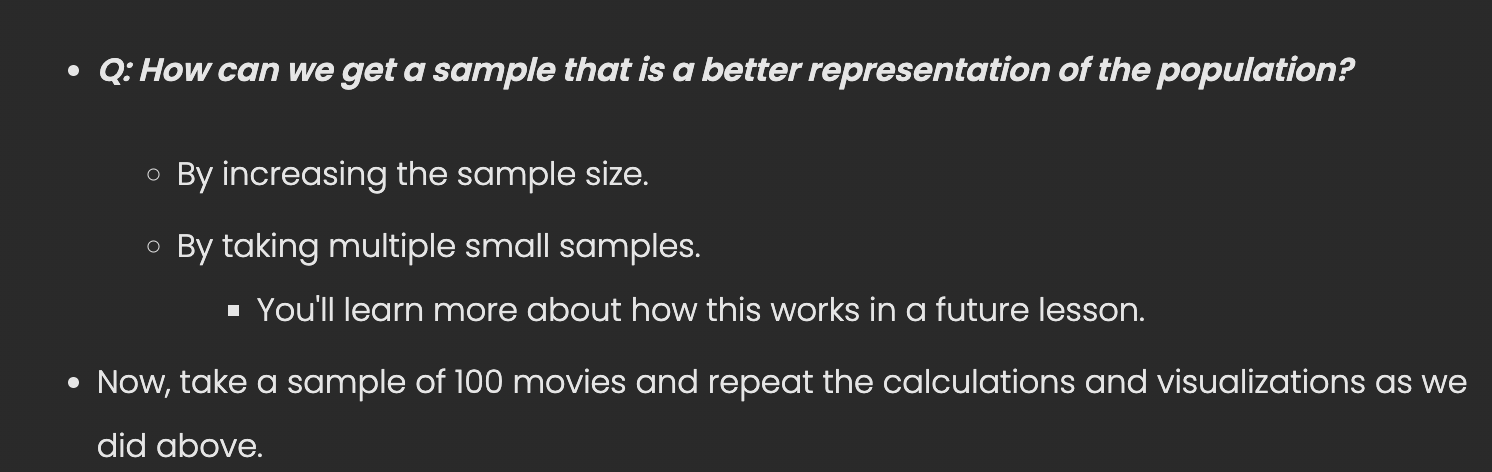

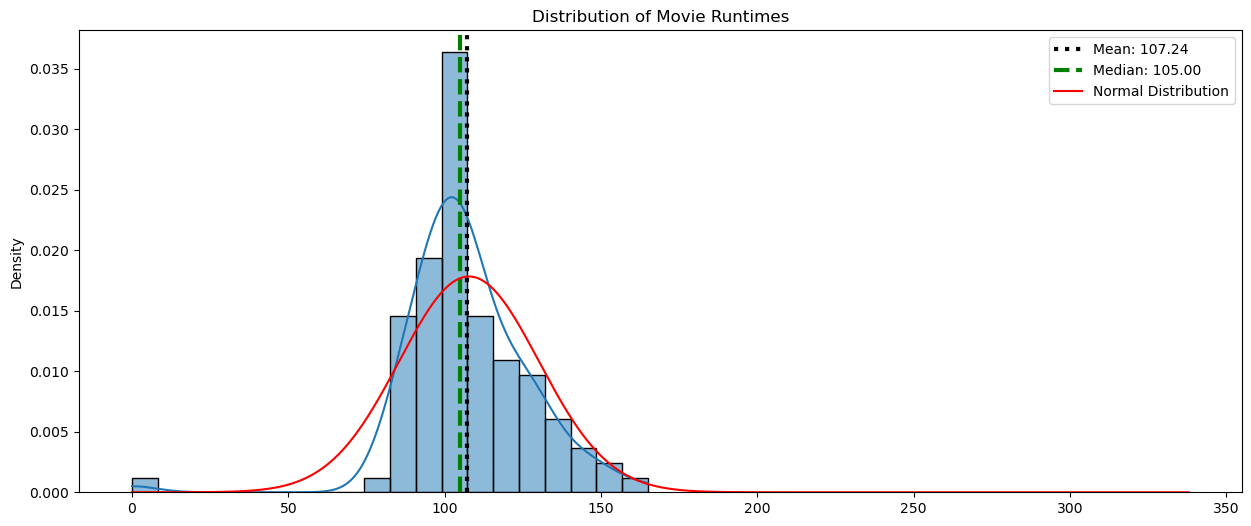

In [9]:
np.random.seed(32)
n = 100
# sampling 100 values from data without replacement
sample = np.random.choice(data, size=n, replace=False)
# calc stats
samp_mean = np.mean(sample)
samp_med = np.median(sample)
samp_std = np.std(sample)
#Set the range and spacing for the x-axis
x_range = np.linspace( np.min(data), np.max(data), num=10000)
#Define x scale, mean and std for the normal curve to be plotted
pdf = stats.norm.pdf(x_range, loc=np.mean(data),
                     scale = np.std(data))

## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=sample,kde=True,ax=ax,stat='density')
ax.set_title('Distribution of Movie Runtimes')
## Annotate mean and median
ax.axvline(samp_mean, ls=':', color='black', lw=3, label =f"Mean: {samp_mean:.2f}")
ax.axvline(samp_med,ls='--', color='green', lw=3, label =f"Median: {samp_med:.2f}")
## Add pdf for normal curve
ax.plot(x_range, pdf,color='red',label='Normal Distribution')
ax.legend()

In [10]:
result = stats.normaltest(sample)
print(result)
result.pvalue < .05

NormaltestResult(statistic=37.233728564765755, pvalue=8.218613776872242e-09)


True

- We can see that with a larger sample size, our sample is looking closer to the original population.

- Notice that our larger sample's mean (107.24) and median (105) are MUCH closer to the population mean(107.79) and median(105.0.) than our small sample.

# Summary
This lesson demonstrates how having limited data (or samples) can result in misleading assumptions about the entire population that is being studied. We must be cautious as our sample may be a very poor representation of our population.  We must always be aware of this. We can improve our sample's ability to represent the population by taking a larger sample size (when possible).  You may also consider any biases that may have occurred during the sampling process that could lead to a misrepresentation of the entire population. (Image you only sample movie runtimes that were rated G.  Would this be a good representation of all movies?)